In [1]:
import numpy as np
import and_logic_generator as and_gen
import and_gate_pipeline as pipeline
import matplotlib.pyplot as plt

# reload modules every 2 seconds
%load_ext autoreload
%autoreload 2

In [2]:
# Repeatable seed
random_state = 2**12
np.random.seed(seed=random_state)


In [3]:
# Prepare samples
n = 2000
scale = 0.06  # Control how spread the blob is.
# Creating 4 blobs
centres = [
    [0.25, 0.25],
    [0.75, 0.25],
    [0.25, 0.75],
    [0.75, 0.75]]

x = np.array([], dtype=np.float32)
y = np.array([], dtype=np.int)
for centre in centres:
    temp_x, temp_y = and_gen.generate_logistic_samples(
        n=int(n / len(centres)), threshold=0.5, centre=centre, scale=scale)
    # numpy append func does NOT allow preallocate multi-dimensional array
    if len(x) == 0:
        x = temp_x
    else:
        x = np.append(x, temp_x, axis=0)
    y = np.append(y, temp_y)
x = x - 0.5
shift = [[-0.5, -0.5]]


In [4]:
and_gate_pipeline = pipeline.AndGatePipeline(x, y)
and_gate_pipeline.random_state = random_state


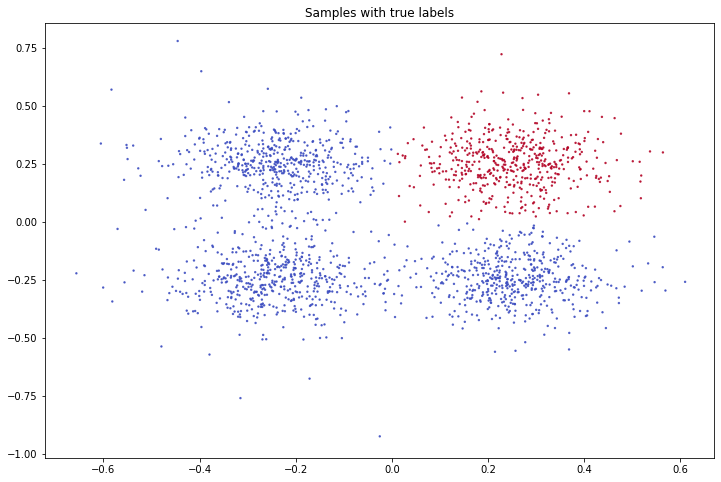

In [5]:
# Parameters for figures
figsize = np.array(plt.rcParams["figure.figsize"]) * 2
x_max = np.amax(x, axis=0) * 1.1
x_min = np.amin(x, axis=0) * 1.1

and_gate_pipeline.plot_data(
    figsize=figsize, xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [6]:
# 80:20 split on training and test sets
and_gate_pipeline.train_test_split(0.2)

Train test split: 0.80:0.20


In [7]:
# Parameters for SVM
gamma='scale'
C=100

and_gate_pipeline.fit_svm_model(gamma=gamma, C=C, shift=shift)


With gamma = scale and C = 100
Accuracy on train set = 100.0000%
Accuracy on test set  = 99.7500%
Passed basic test


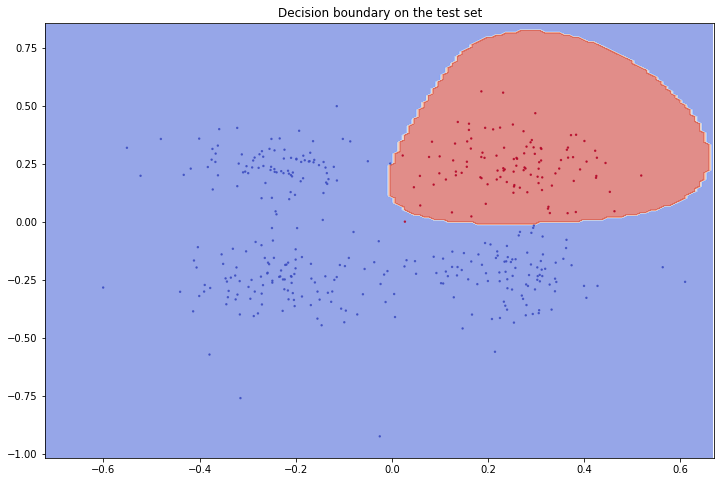

In [9]:
and_gate_pipeline.plot_prediction(
    figsize, h=0.01, 
    mesh_xlim=[x_min[0], x_max[0]], mesh_ylim=[x_min[1], x_max[1]], 
    xlim=[x_min[0], x_max[0]], ylim=[x_min[1], x_max[1]])


In [8]:
and_gate_pipeline.model.get_params()


{'C': 100,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 4096,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [10]:
# Parameter for stepping size of Adversarial Examples
epsilon=0.0006

and_gate_pipeline.generate_adversarial_examples(epsilon=epsilon)


Negative mean = [-0.0848, -0.0740]
Positive mean = [0.2498, 0.2561]
Completed after 1527 epoch...
Misclassified = 292
Misclassified negative = 66 (16.5000%)
Misclassified positive = 226 (56.5000%)
Found 292 Adversarial Examples out of 400. 73.0000% successful rate


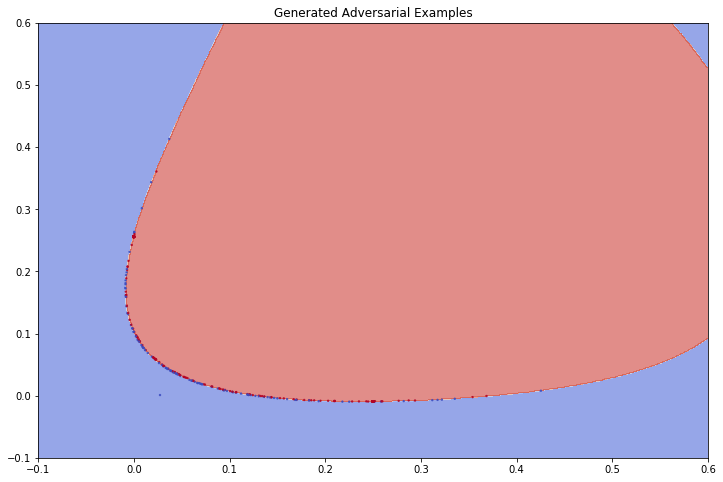

In [11]:
and_gate_pipeline.plot_adversarial_examples(
    figsize, h=0.001,
    mesh_xlim=[-0.1, 0.6], mesh_ylim=[-0.1, 0.6],
    xlim=[-0.1, 0.6], ylim=[-0.1, 0.6])


In [12]:
# Parameters for Applicability Domain
k = 9
zeta0 = 2.2
zeta1 = 1.5

and_gate_pipeline.run_applicability_domain(zeta0=zeta0, zeta1=zeta1, k=k)



---------- Applicability ---------------
Pass rate = 100.0000%

---------- Reliability -----------------

In 0 class:
Threshold = 0.0758
Average mean = 0.0841
Passed indices:
5, 7, 29, 42, 44, 54, 55, 61, 77, 79, 86, 92, 96, 115, 126, 132, 134, 136, 161, 164, 176, 188, 190, 197, 199, 214, 222, 237, 255, 281, 287, 288, 310, 332, 333, 339, 346, 347, 352, 353, 365, 371, 379, 394

In 1 class:
Threshold = 0.0588
Average mean = 0.0696
Passed indices:
0, 1, 12, 24, 26, 33, 37, 41, 52, 53, 56, 59, 62, 75, 76, 83, 89, 90, 91, 95, 99, 100, 112, 117, 125, 144, 145, 147, 155, 156, 160, 168, 171, 174, 178, 181, 183, 187, 193, 198, 200, 201, 203, 209, 210, 220, 221, 224, 236, 243, 245, 250, 252, 254, 257, 264, 266, 268, 269, 270, 271, 272, 273, 279, 285, 295, 296, 299, 308, 314, 318, 324, 326, 328, 331, 341, 343, 344, 362, 372, 376, 377, 384, 385, 389, 393, 398
Distance of c0 in training set:
Mean               = 0.0281
Standard deviation = 0.0217
Threshold          = 0.0758

Distance of c1 in trai

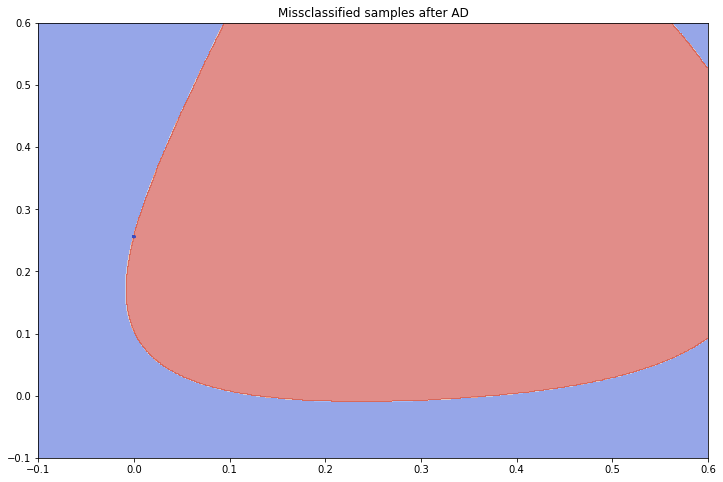

In [13]:
and_gate_pipeline.plot_after_ad(
    figsize, h=0.001,
    mesh_xlim=[-0.1, 0.6], mesh_ylim=[-0.1, 0.6],
    xlim=[-0.1, 0.6], ylim=[-0.1, 0.6])